# Data visualization  and feature selection

For this tutorial I will be using matplotlib and seaborn. I will use pandas to handle the csv cells. Then, after the visualization, I'll do a RandomForest Classifier test
<br>
<br>
The dataset I'm using is available here https://www.kaggle.com/lodetomasi1995/income-classification/data just in case someone wants to practice by themselves.

In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [129]:
# Next, we'll load the Iris flower dataset, which is in the "./data/" directory
data_income = pd.read_csv("./data/income_evaluation.csv") # the income_evaluation dataset is now a Pandas DataFrame

# Let's see what's in the DataFrame
data_income.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [35]:
data_income.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [38]:
# We remove Nan values, if any
data_income[data_income.isnull().any(axis=1)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [5]:
data_income

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


From now on we can do whatever we please with this data. How about investigating a bit? It may help us know the data we are working with. For example, we can count how many people earns less than 50K, how much hours these people work per week, their marital status, their age...

In [6]:
# Let's see how many working classes we have availabe in our dataset
data_income['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [7]:
# Let's see how many people earns more than 50K and how many people earns less
data_income['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [8]:
# Let's see what's the education of these people
data_income['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

## Scatter plots
First we are going to see one of the most common and easiest plots. Scatter plots are great for determining the relationship between two variables. If you want to create a scatter plot using matplotlib, you must use <i>.scatter()</i> function. The function requires two arguments, which represent the X and Y coordinate values. 
<br>
In this example we are going to see the distribution between the the education (X) age (Y) of people.

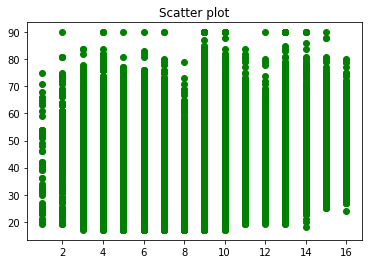

In [29]:
plt.scatter(data_income['education-num'],data_income['age'], color='green')
plt.title('Scatter plot')
plt.show()

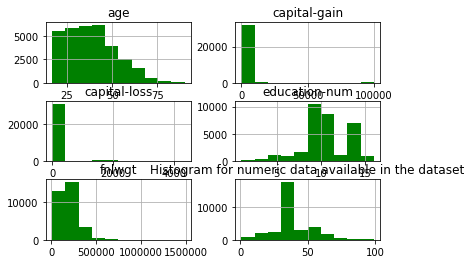

In [30]:
# create histogram for numeric data 
#data_income.hist(color='green') 
# show plot 
plot = data_income.hist(color='green') 
plt.title('Histogram for numeric data available in the dataset')
plt.show()


## Box plot chart

is probably one of the most common type of graphic. It gives a nice summary of one or several numeric variables. The line that divides the box into 2 parts represents the median of the data. The end of the box shows the upper and lower quartiles. The extreme lines shows the highest and lowest value excluding outliers. Note that boxplot hide the number of values existing behind the variable. Thus, it is highly advised to print the number of observation, add unique observation with jitter or use a violin plot, which we'll use later, if you have many observations.


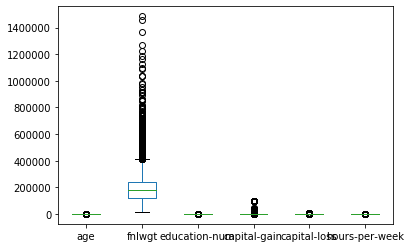

In [11]:
# For each numeric attribute of dataframe 
data_income.plot.box() 

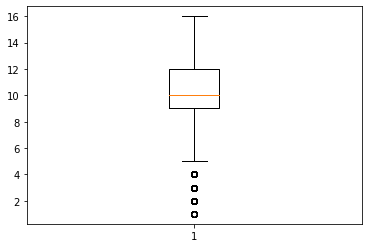

In [13]:
# individual attribute box plot 
plt.boxplot(data_income['education-num']) 
plt.show() 

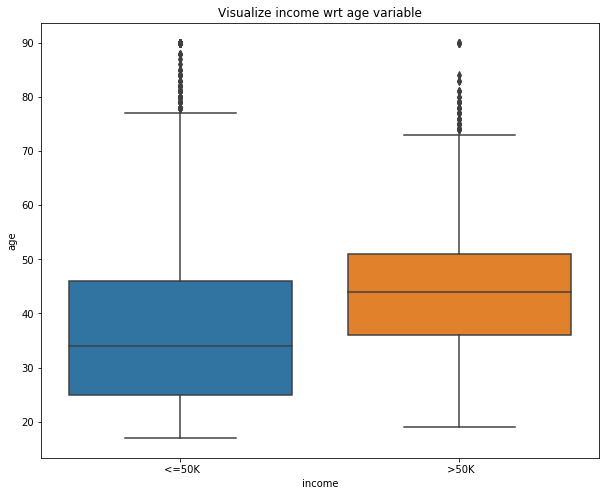

In [21]:
# Explore relationship between 2 variables

f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="income", y="age", data=data_income)
ax.set_title("Visualize income wrt age variable")
plt.show()

## Violin plot

A violin plot is a method of plotting numeric data. It is similar to a box plot, with the addition of a rotated kernel density plot on each side. Violin plots have many of the same summary statistics as box plots:

    the white dot represents the median
    the thick gray bar in the center represents the interquartile range
    the thin gray line represents the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the interquartile range.


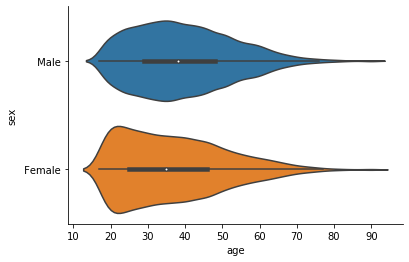

In [14]:
sns.violinplot(data_income['age'], data_income['sex']) #Variable Plot
sns.despine()

##  Pie Chart 
A pie chart shows a static number and how categories represent part of a whole the composition of something. A pie chart represents numbers in percentages, and the total sum of all segments needs to equal 100%. As we can see, there's a lot mor people earning less than 50K.

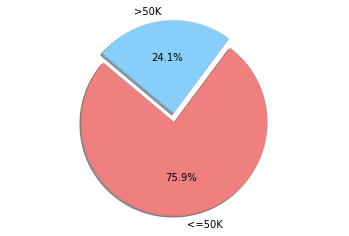

In [15]:
# Data to plot
labels = '<=50K', '>50K'
sizes = data_income['income'].value_counts() 
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

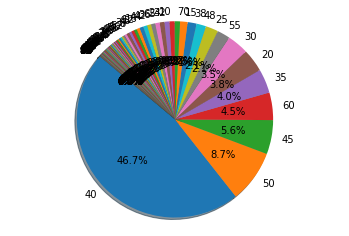

In [16]:
# Data to plot
labels = data_income['hours-per-week'].value_counts().index.tolist()
sizes = data_income['hours-per-week'].value_counts().to_list()
#colors = ['lightcoral', 'lightskyblue']
#explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, labels=labels, 
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

As we saw in the saw in the previous pie plot, there's too much values to plot that is not easy to see properly either the values nor the percentages of each value. That's why we should filter our variables a bit. If we try to pie plot the "age" column, it'll be impossible to see anything useful. So we can use pandas library to filter the data and, for example, plot the 8 most common ages:

If we run this line: <br>data_income.age.value_counts().nlargest(8)
<br>
We will get:<br><br>
36    898<br>
31    888<br>
34    886<br>
23    877<br>
35    876<br>
33    875<br>
28    867<br>
30    861<br>
Name: age, dtype: int64 <br><br>

Which means there's no much difference among the most common ages in this dataset. We are going to plot it.


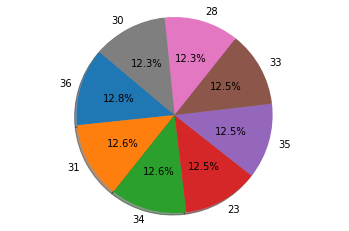

In [17]:
# Data to plot
labels = data_income.age.value_counts().nlargest(8).index.tolist()
sizes = data_income.age.value_counts().nlargest(8).to_list()
#colors = ['lightcoral', 'lightskyblue']
#explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, labels=labels, 
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

## Column chart

Plot the bar chart for numeric values <br>
a comparison will be shown between plots age and income<br>
Just like scatter plot requires two arguments, which represent the X and Y coordinate values. 

<BarContainer object of 8 artists>

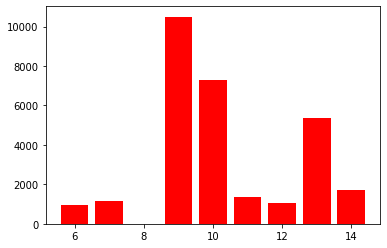

In [18]:
# Plot the bar chart for numeric values 
# a comparison will be shown between all numeric columns in the dataset

# Data to plot
labels = data_income['education-num'].value_counts().nlargest(8).index.tolist()
sizes = data_income['education-num'].value_counts().nlargest(8).to_list()

plt.bar(labels,sizes,color='red')

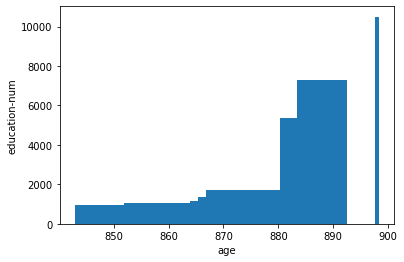

In [19]:
# plot between 2 attributes 
plt.bar(data_income['age'].value_counts().nlargest(8), data_income['education-num'].value_counts().nlargest(8)) 
plt.xlabel("age") 
plt.ylabel("education-num") 
plt.show()

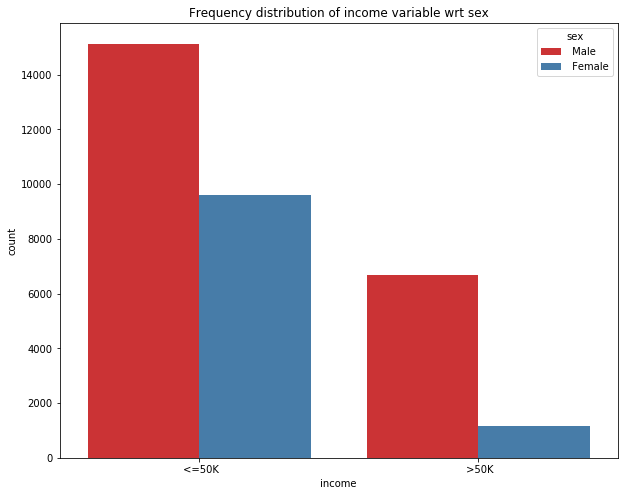

In [7]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="sex", data=data_income, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt sex")
plt.show()

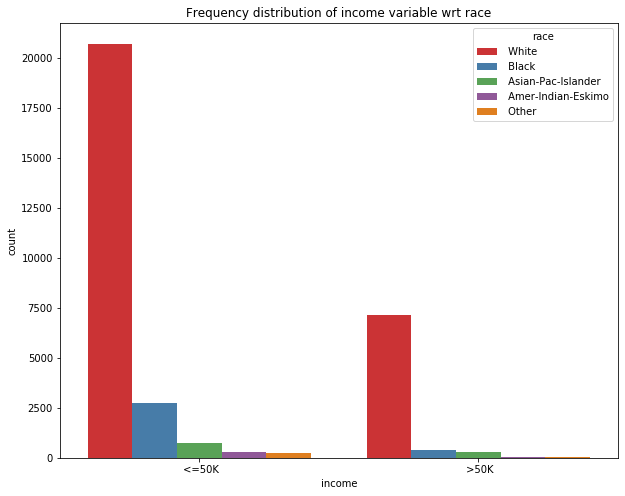

In [8]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="race", data=data_income, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt race")
plt.show()

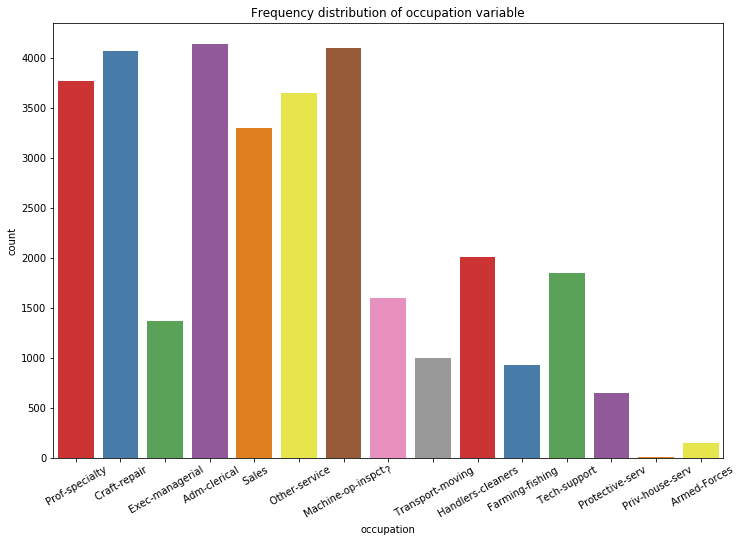

In [17]:
# visualize frequency distribution of `occupation` variable

f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="occupation", data=data_income, palette="Set1")
ax.set_title("Frequency distribution of occupation variable")
ax.set_xticklabels(data_income.occupation.value_counts().index, rotation=30)
plt.show()



## Heat map plot

In [ ]:
plt.figure(figsize=(25,12))
sns.heatmap(corr, annot=True)
plt.show()

## Pairplot with seaborn

Another useful seaborn plot is the pairplot, which shows the bivariate relation
between each pair of features
<br>
<br>
This plot is specially useful when you have to do some feature engineering.

In this example I'm using KDE. KDE is a way to estimate the probability density function of a continuous random variable. It is used for non-parametric analysis. How does a KDE plot looks like? If we want to plot age and income we must not use a string as an input to our plot. So we do this:

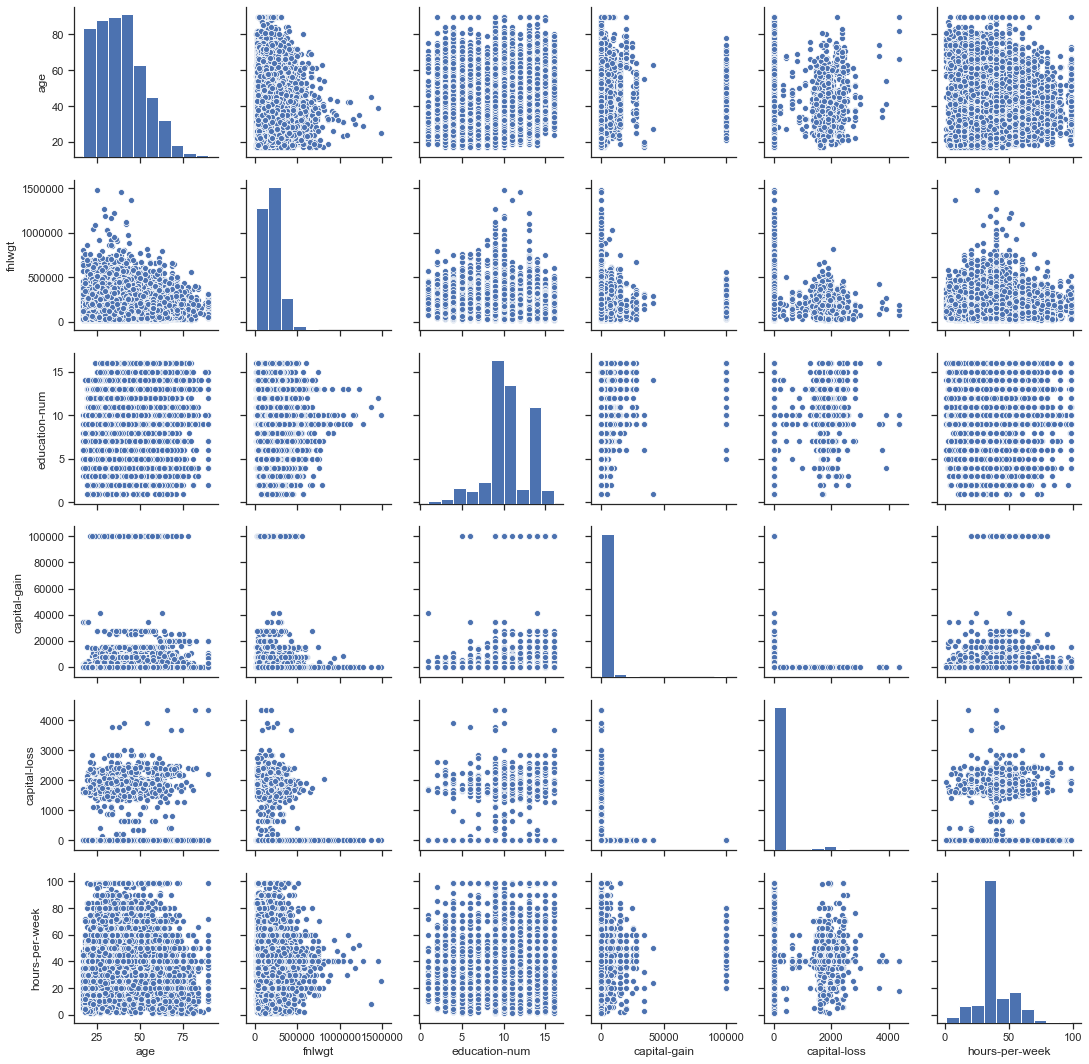

In [27]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data_income, diag_kind="kde")
plt.show()

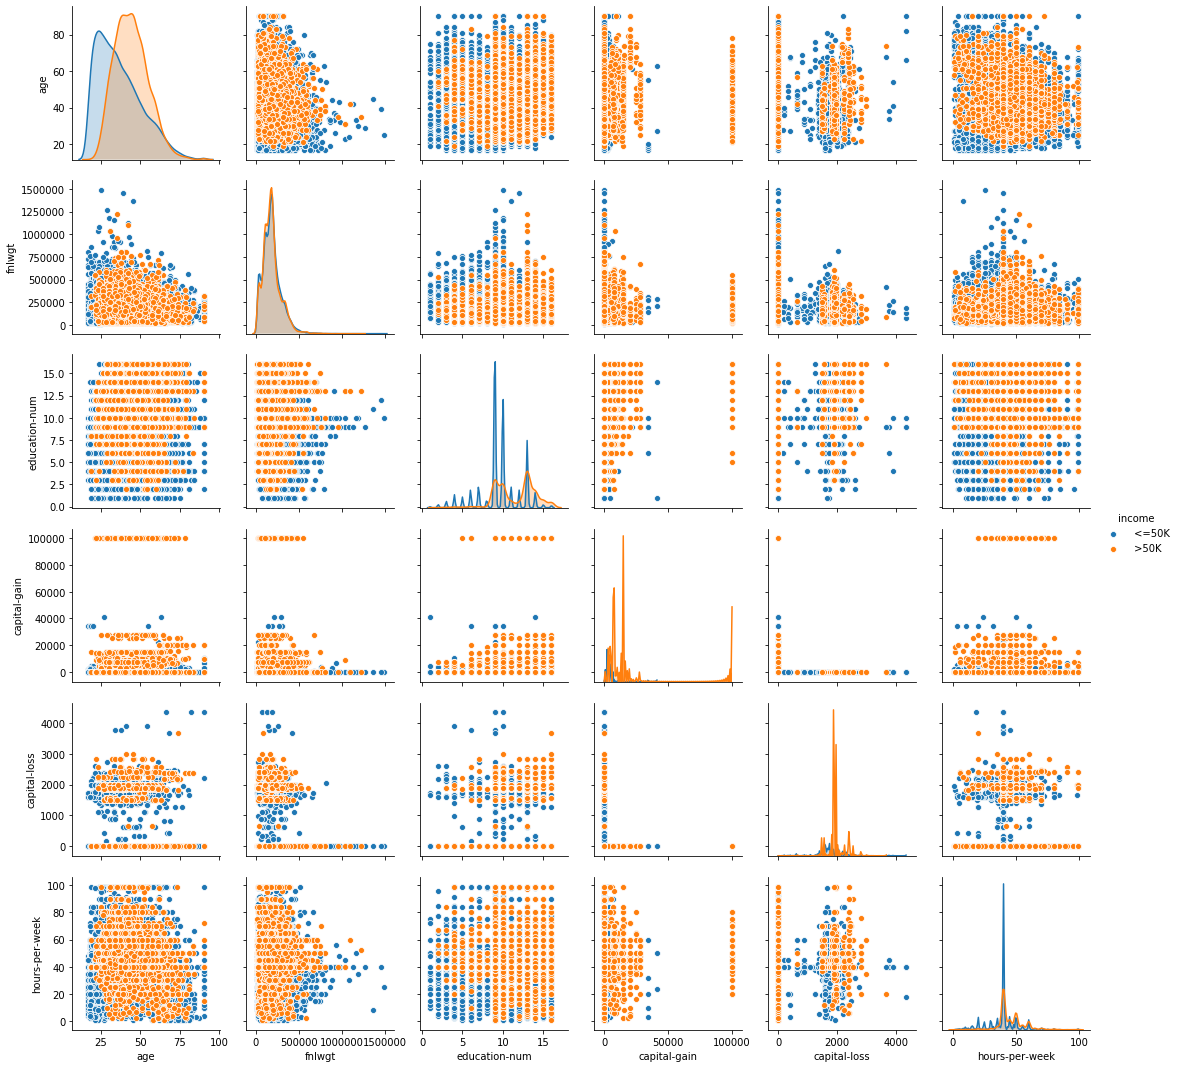

In [31]:
sns.pairplot(data_income, hue="income")
plt.show()

# Random Forest Classifier

After data visualization, we know how's distributed our data. <br>
First, we have to hot-encode the categorical columns, which means that a categorical feature becomes an array whose size is the number of possible choices for that features. i.e.
<br>
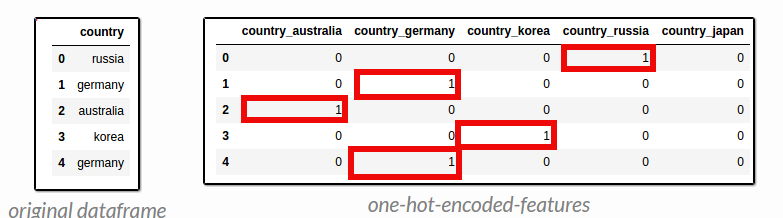
<br>
Then, I'm going to frop income column and add it to y variable, which is the one we have to predict.

In [149]:
# import category encoders
import category_encoders as ce

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.metrics import accuracy_score

In [131]:
X = data_income.drop(['income'], axis=1)
del X['education']
y = data_income['income']

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [133]:
X_train

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
29,49,Private,193366,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
12181,27,Private,134152,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,45,United-States
18114,44,Private,169980,7,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,60,United-States
4278,59,Private,656036,13,Separated,Adm-clerical,Unmarried,White,Male,0,0,60,United-States
12050,54,Private,188136,13,Divorced,Sales,Not-in-family,White,Female,0,1408,38,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,47,Private,359461,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
5390,31,Private,147215,8,Divorced,Other-service,Unmarried,White,Female,0,0,21,United-States
860,18,Private,216284,7,Never-married,Adm-clerical,Own-child,White,Female,0,0,20,United-States
15795,50,Self-emp-not-inc,54261,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,84,United-States


## Feature engineering

In [134]:
# Separate categorical from numerical data
categorical_data = [col for col in X_train.columns if X_train[col].dtypes == 'object']
#X_train[categorical_data].head()
numerical_data = numerical = [col for col in X_train.columns if X_train[col].dtypes == 'int64']
#X_train[numerical_data].head()

In [135]:
# encode categorical variables with one-hot encoding
encoder = ce.OneHotEncoder(cols=['workclass', 'marital-status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native-country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)
# Now we have a train and  test set with one-hot encoded values: 
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,workclass_9,...,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41,native-country_42
29,49,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12181,27,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18114,44,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4278,59,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12050,54,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
cols = X_train.columns # train column names

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

## Let's train our model

Now  we have everything one hot coded and prepared, we can start training our Random Forest Model. After training, I'll print accuracy and confusion matrix

In [137]:
# First, we instantiate the classifier 
# For this training, I'll be using 120 decision trees
rforestc = RandomForestClassifier(n_estimators=120, random_state=0)

# fit the model
rforestc.fit(X_train, y_train) # This might take a while

# Predict the Test set results
y_pred = rforestc.predict(X_test)

In [156]:
print('Confusion matrix')
print(classification_report(y_test, y_pred))
print('Accuracy in test set', accuracy_score(y_test, y_pred))

Confusion matrix
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      6214
        >50K       0.75      0.63      0.68      1927

    accuracy                           0.86      8141
   macro avg       0.82      0.78      0.80      8141
weighted avg       0.86      0.86      0.86      8141

Accuracy in test set 0.8615649183147034


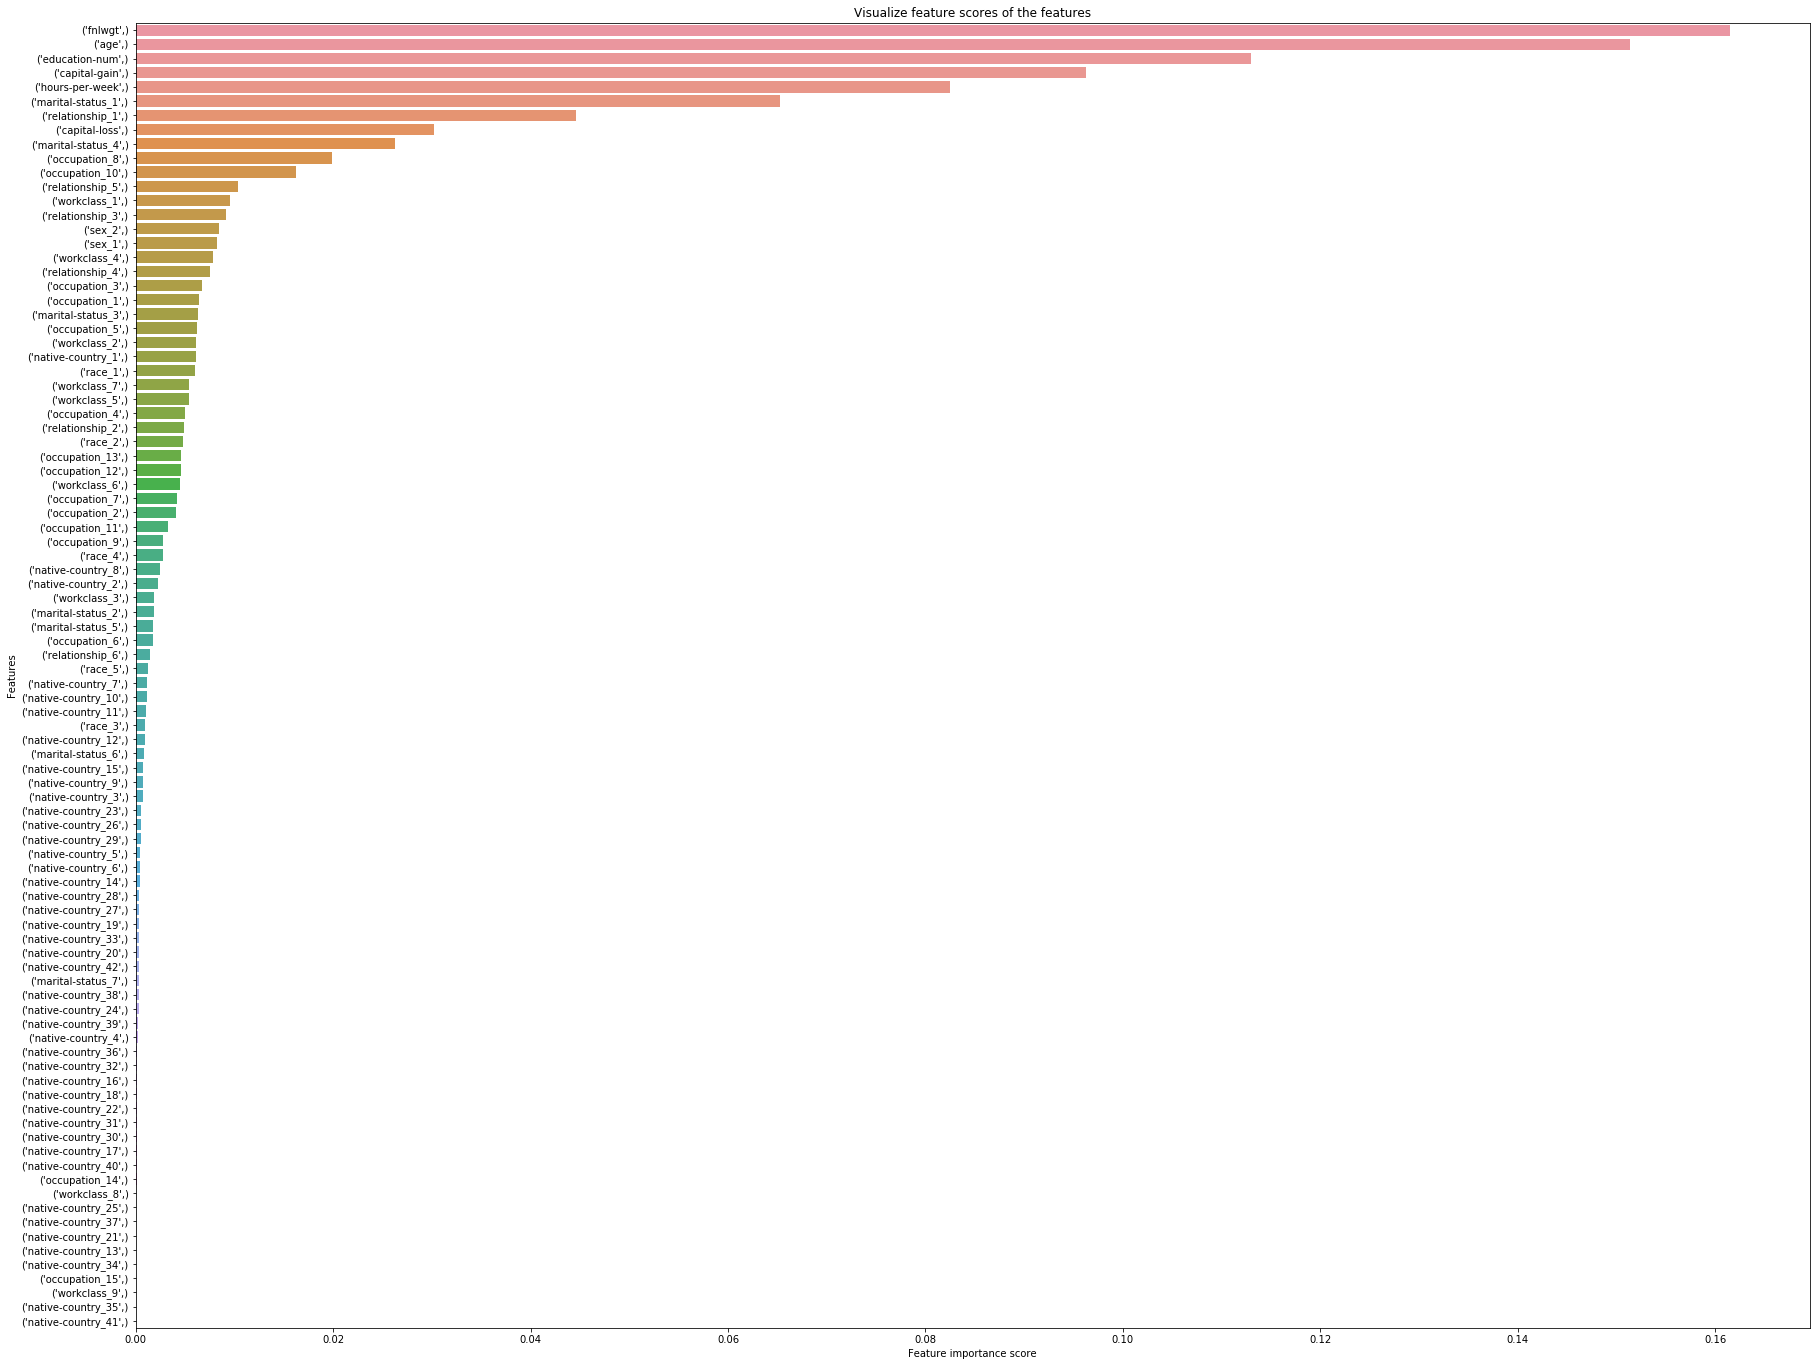

In [158]:
# view the feature scores
feature_scores = pd.Series(rforestc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=data_income)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()